In [70]:
import pandas as pd
import numpy as np 

In [71]:
df = pd.read_csv(r'/content/SampleSuperstore.csv')
df.head()
df.shape

(9994, 13)

In [72]:
df.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country  ... Quantity Discount  Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.91
1       Second Class   Consumer  United States  ...        3     0.00  219.58
2       Second Class  Corporate  United States  ...        2     0.00    6.87
3     Standard Class   Consumer  United States  ...        5     0.45 -383.03
4     Standard Class   Consumer  United States  ...        2     0.20    2.52
...              ...        ...            ...  ...      ...      ...     ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.10
9990  Standard Class   Consumer  United States  ...        2     0.00   15.63
9991  Standard Class   Consumer  United States  ...        2     0.20   19.39
9992  Standard Class   Consumer  United States  ...        4     0.00   13.32
9993    Second Class   Consumer  United States  ...        2     0.00   72.95

[9994 rows x 13 columns]>

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [74]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.00","9,994.00","9,994.00","9,994.00","9,994.00"
mean,"55,190.38",229.86,3.79,0.16,28.66
std,"32,063.69",623.25,2.23,0.21,234.26
min,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"23,223.00",17.28,2.00,0.00,1.73
50%,"56,430.50",54.49,3.00,0.20,8.67
75%,"90,008.00",209.94,5.00,0.20,29.36
max,"99,301.00","22,638.48",14.00,0.80,"8,399.98"


In [75]:

df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0.00,14.17
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0.00,1.97
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.15,6,0.20,90.72
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.50,3,0.20,5.78
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.90,5,0.00,34.47


In [76]:
df.isnull().sum().sort_values(ascending=False)

Profit          0
Discount        0
Quantity        0
Sales           0
Sub-Category    0
Category        0
Region          0
Postal Code     0
State           0
City            0
Country         0
Segment         0
Ship Mode       0
dtype: int64

In [77]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [78]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [79]:
from sklearn .preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category'].unique()

array([0, 1, 2])

In [80]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [81]:
df['Region'] = le.fit_transform(df['Region'])
df['Region'].nunique()

4

In [82]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [83]:
df['Segment'] = le.fit_transform(df['Segment'])
df['Segment'].nunique()

3

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

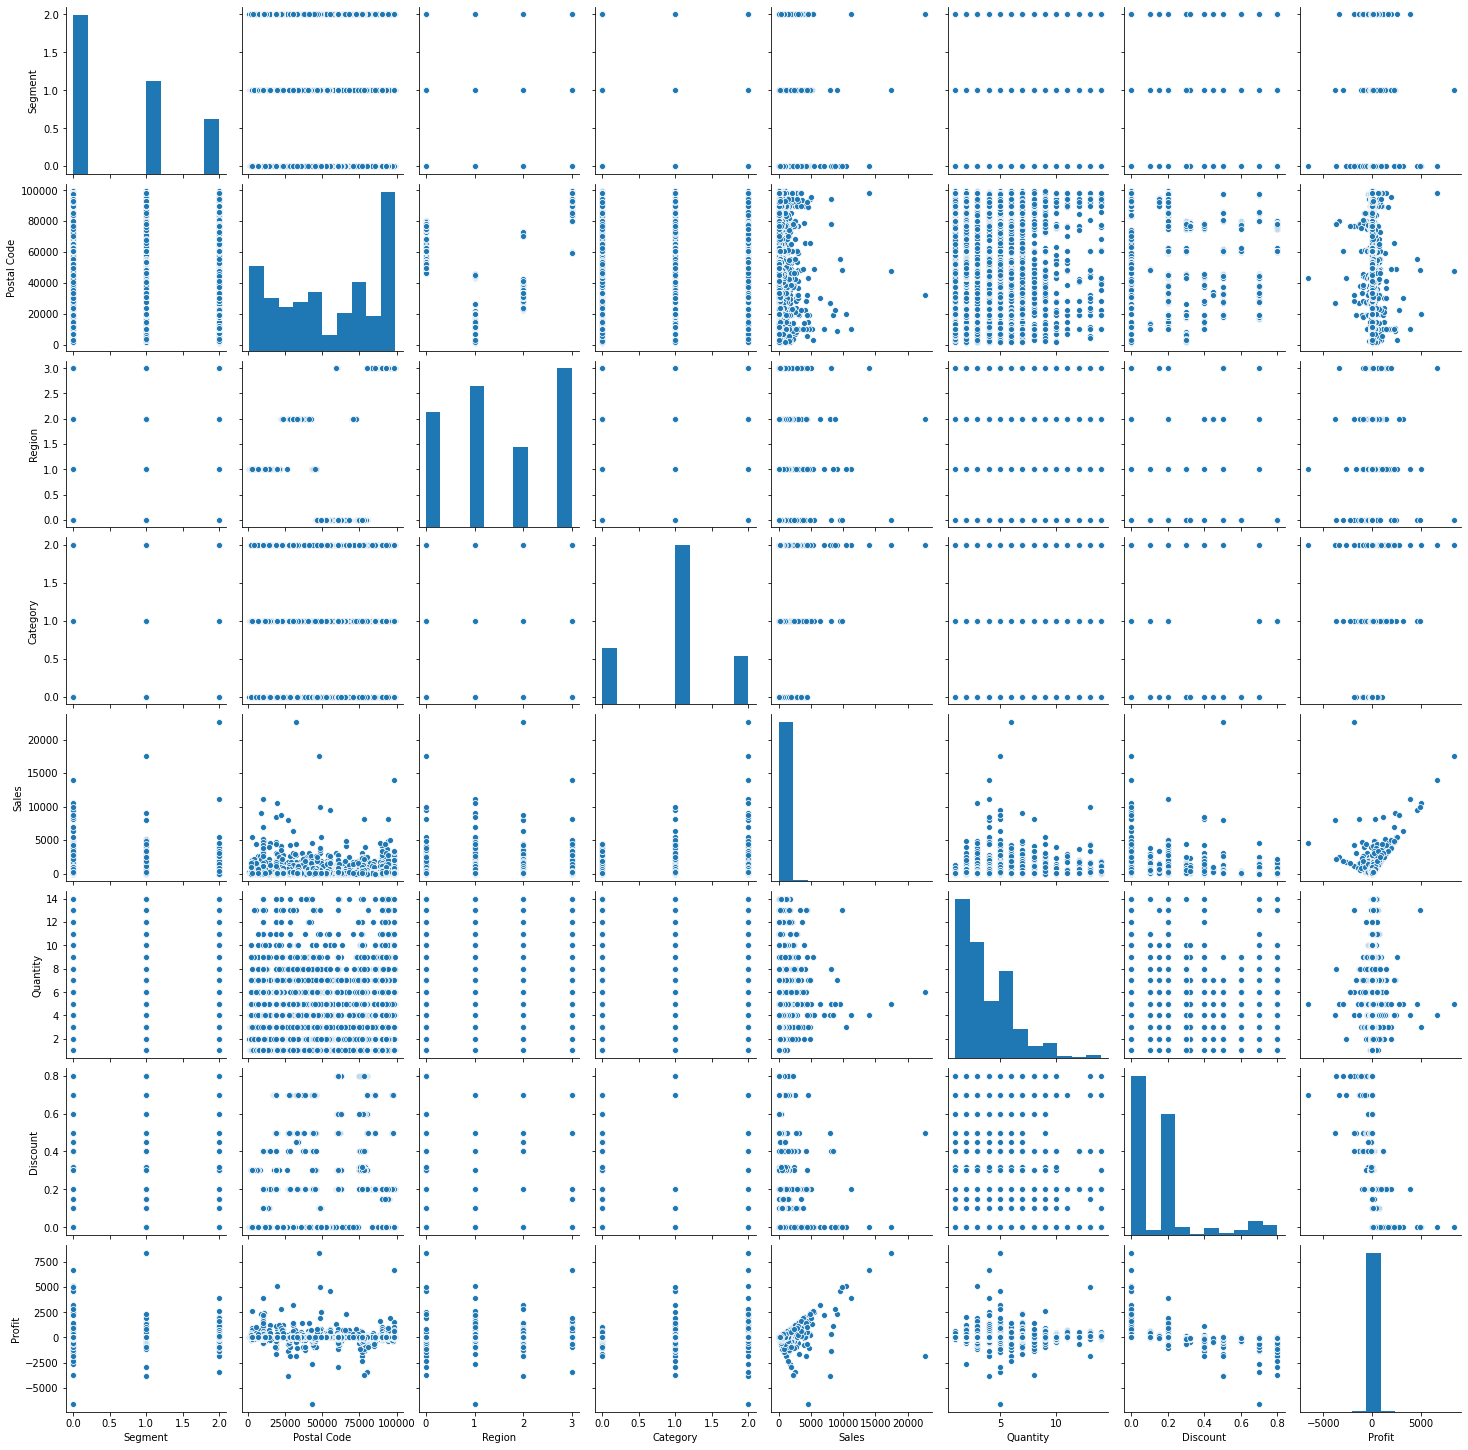

In [85]:
sns.pairplot(df,height= 2.5)

In [86]:

col_study  = ['Postal Code','Sales','Quantity','Discount']

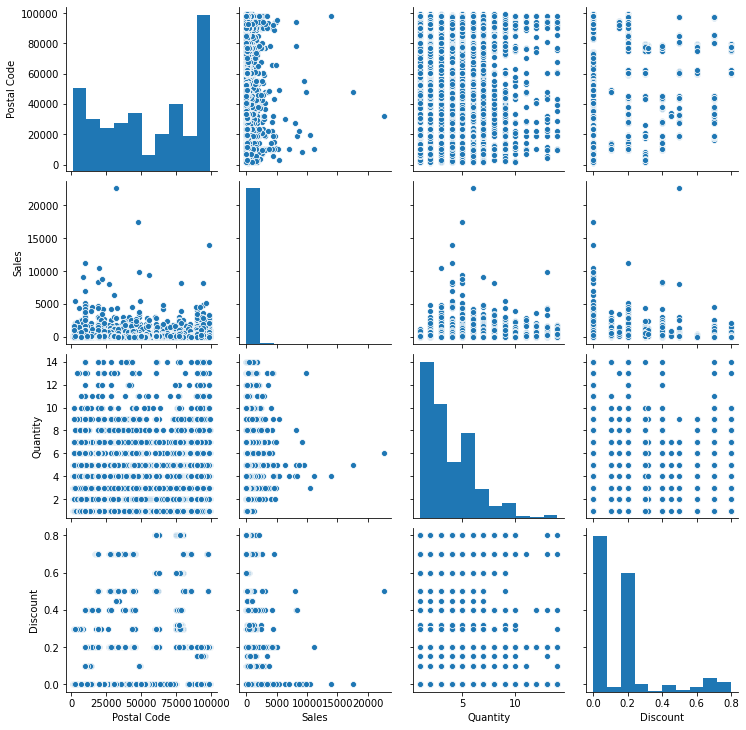

In [87]:
sns.pairplot(df[col_study],height=2.5)
plt.show()

In [88]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()

,Segment,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Segment,1.00,-0.01,-0.01,0.01,0.01,0.01,-0.02,0.01
Postal Code,-0.01,1.00,0.47,-0.00,-0.02,0.01,0.06,-0.03
Region,-0.01,0.47,1.00,-0.01,0.00,0.01,-0.21,0.02
Category,0.01,-0.00,-0.01,1.00,0.04,-0.00,-0.06,0.09
Sales,0.01,-0.02,0.00,0.04,1.00,0.20,-0.03,0.48
Quantity,0.01,0.01,0.01,-0.00,0.20,1.00,0.01,0.07
Discount,-0.02,0.06,-0.21,-0.06,-0.03,0.01,1.00,-0.22
Profit,0.01,-0.03,0.02,0.09,0.48,0.07,-0.22,1.00


In [89]:
df['Sub-Category'].describe()

count        9994
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object

In [90]:
object_df = df.select_dtypes(include=['object']).copy()
object_df.head()

,Ship Mode,Country,City,State,Sub-Category
0,Second Class,United States,Henderson,Kentucky,Bookcases
1,Second Class,United States,Henderson,Kentucky,Chairs
2,Second Class,United States,Los Angeles,California,Labels
3,Standard Class,United States,Fort Lauderdale,Florida,Tables
4,Standard Class,United States,Fort Lauderdale,Florida,Storage


In [91]:
object_df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [92]:
df["Ship Mode"] = df["Ship Mode"].astype('category')
df.dtypes

Ship Mode       category
Segment            int64
Country           object
City              object
State             object
Postal Code        int64
Region             int64
Category           int64
Sub-Category      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [93]:
df['Ship Mode'] = df['Ship Mode'].cat.codes
df['Ship Mode'].value_counts()

3    5968
2    1945
0    1538
1     543
Name: Ship Mode, dtype: int64

In [94]:
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])
df['Sub-Category'].nunique()

17

In [95]:
df.dtypes

Ship Mode          int8
Segment           int64
Country          object
City             object
State            object
Postal Code       int64
Region            int64
Category          int64
Sub-Category      int64
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [96]:
object_df['City'].nunique()

531

In [97]:
 df['State'].nunique()

49

In [98]:
# df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)


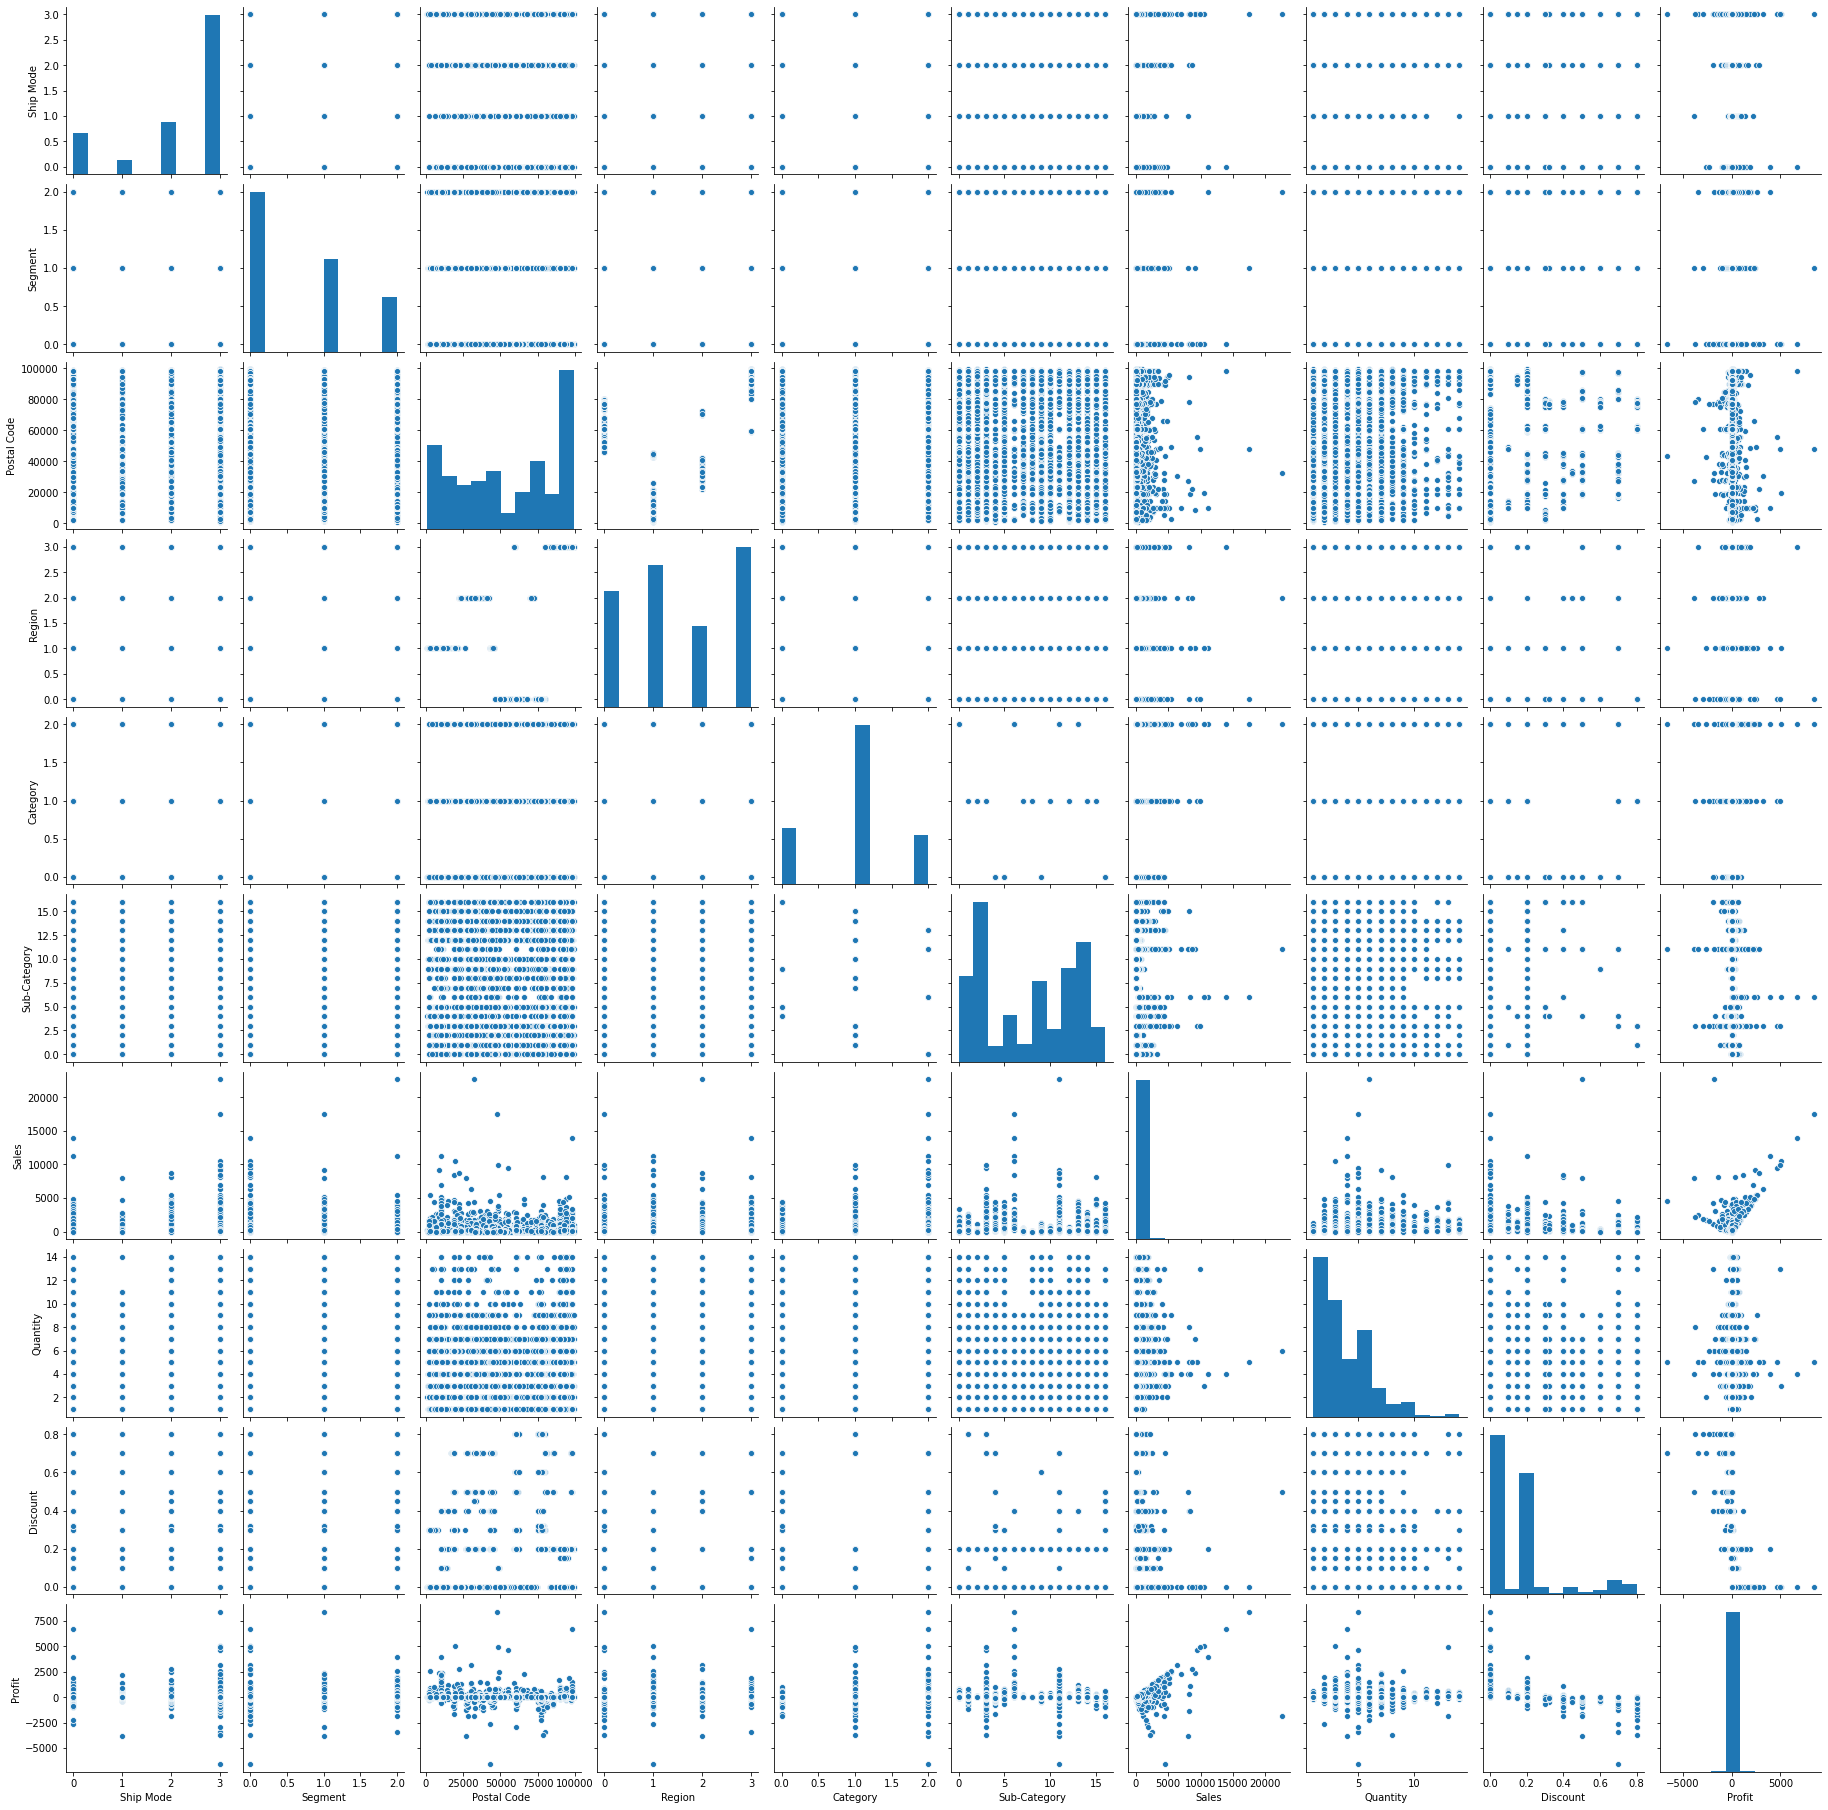

In [99]:
col_study1 = ['Ship Mode','Segment','Postal Code','Region','Category','Sub-Category','Sales','Quantity','Discount','Profit']
sns.pairplot(df[col_study1],height=2.5)
plt.show()

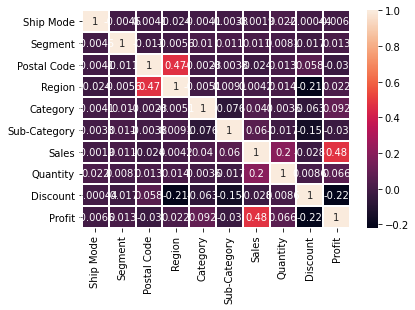

In [100]:
sns.heatmap(df[col_study1].corr(),annot=True,linewidths=1)

In [101]:
df[col_study1].corr()

,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,1.00,-0.00,-0.00,-0.02,-0.00,-0.00,-0.00,0.02,-0.00,-0.01
Segment,-0.00,1.00,-0.01,-0.01,0.01,0.01,0.01,0.01,-0.02,0.01
Postal Code,-0.00,-0.01,1.00,0.47,-0.00,-0.00,-0.02,0.01,0.06,-0.03
Region,-0.02,-0.01,0.47,1.00,-0.01,0.01,0.00,0.01,-0.21,0.02
Category,-0.00,0.01,-0.00,-0.01,1.00,-0.08,0.04,-0.00,-0.06,0.09
Sub-Category,-0.00,0.01,-0.00,0.01,-0.08,1.00,0.06,-0.02,-0.15,-0.03
Sales,-0.00,0.01,-0.02,0.00,0.04,0.06,1.00,0.20,-0.03,0.48
Quantity,0.02,0.01,0.01,0.01,-0.00,-0.02,0.20,1.00,0.01,0.07
Discount,-0.00,-0.02,0.06,-0.21,-0.06,-0.15,-0.03,0.01,1.00,-0.22
Profit,-0.01,0.01,-0.03,0.02,0.09,-0.03,0.48,0.07,-0.22,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f420428cf98>,
      dtype=object)

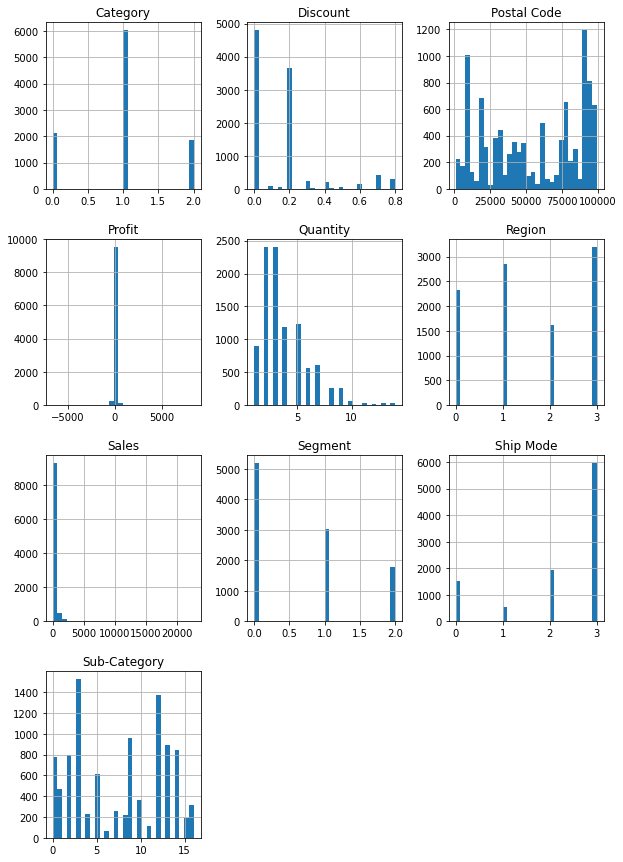

In [102]:
df.hist(figsize=(10,15),bins=30)

In [103]:
city_freq = df.groupby('City').size() / (len(df)/100)
city_freq

City
Aberdeen      0.01
Abilene       0.01
Akron         0.21
Albuquerque   0.14
Alexandria    0.16
              ... 
Woonsocket    0.04
Yonkers       0.15
York          0.05
Yucaipa       0.01
Yuma          0.04
Length: 531, dtype: float64

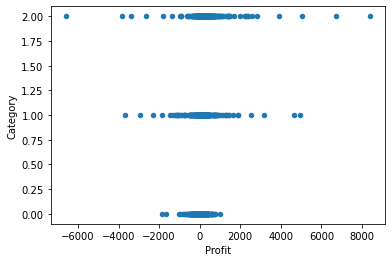

In [104]:
df.plot(kind='scatter',x='Profit',y='Category')

In [105]:
df['city_encode'] = df['City'].apply(lambda x : city_freq[x])
df['city_encode'].value_counts()

9.16    915
7.47    747
5.37    537
5.10    510
4.28    428
       ... 
0.43     43
0.41     41
0.40     40
0.37     37
0.35     35
Name: city_encode, Length: 70, dtype: int64

In [106]:
df.dtypes

Ship Mode          int8
Segment           int64
Country          object
City             object
State            object
Postal Code       int64
Region            int64
Category          int64
Sub-Category      int64
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
city_encode     float64
dtype: object

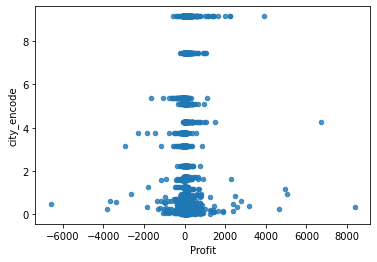

In [111]:
df.plot(kind='scatter',x='Profit',y='city_encode',alpha=0.8)

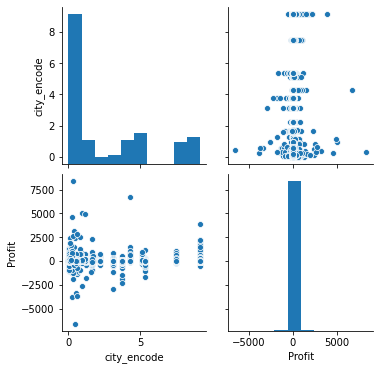

In [108]:
sns.pairplot(df[['city_encode','Profit']])

In [109]:
city_freq = df.groupby('State').size() / (len(df)/100)
city_freq

State
Alabama                 0.61
Arizona                 2.24
Arkansas                0.60
California             20.02
Colorado                1.82
Connecticut             0.82
Delaware                0.96
District of Columbia    0.10
Florida                 3.83
Georgia                 1.84
Idaho                   0.21
Illinois                4.92
Indiana                 1.49
Iowa                    0.30
Kansas                  0.24
Kentucky                1.39
Louisiana               0.42
Maine                   0.08
Maryland                1.05
Massachusetts           1.35
Michigan                2.55
Minnesota               0.89
Mississippi             0.53
Missouri                0.66
Montana                 0.15
Nebraska                0.38
Nevada                  0.39
New Hampshire           0.27
New Jersey              1.30
New Mexico              0.37
New York               11.29
North Carolina          2.49
North Dakota            0.07
Ohio                    4.69
Oklahoma

In [110]:
df['State_encode'] = df['State'].apply(lambda x : city_freq[x])
df['State_encode'].value_counts()

20.02    2001
11.29    1128
9.86      985
5.87      587
5.06      506
4.92      492
4.69      469
2.24      448
3.83      383
2.55      255
2.49      249
1.84      184
1.83      183
1.82      182
1.49      149
1.39      139
1.35      135
0.66      132
1.30      130
1.24      124
1.10      110
0.53      106
1.05      105
0.96       96
0.89       89
0.42       84
0.82       82
0.61       61
0.60       60
0.56       56
0.39       39
0.38       38
0.37       37
0.30       30
0.27       27
0.24       24
0.21       21
0.15       15
0.12       12
0.11       11
0.10       10
0.08        8
0.07        7
0.04        4
0.01        1
Name: State_encode, dtype: int64

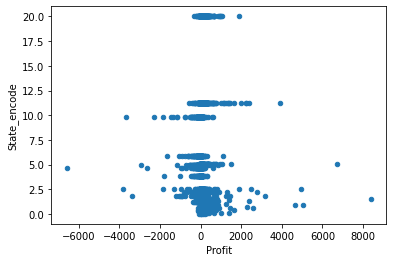

In [112]:
df.plot(kind='scatter',x='Profit',y='State_encode')

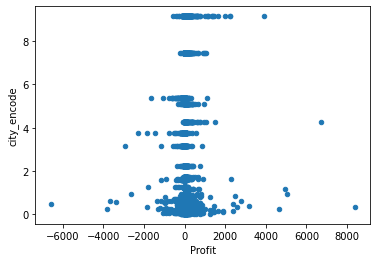

In [113]:
df.plot(kind='scatter',x='Profit',y='city_encode')

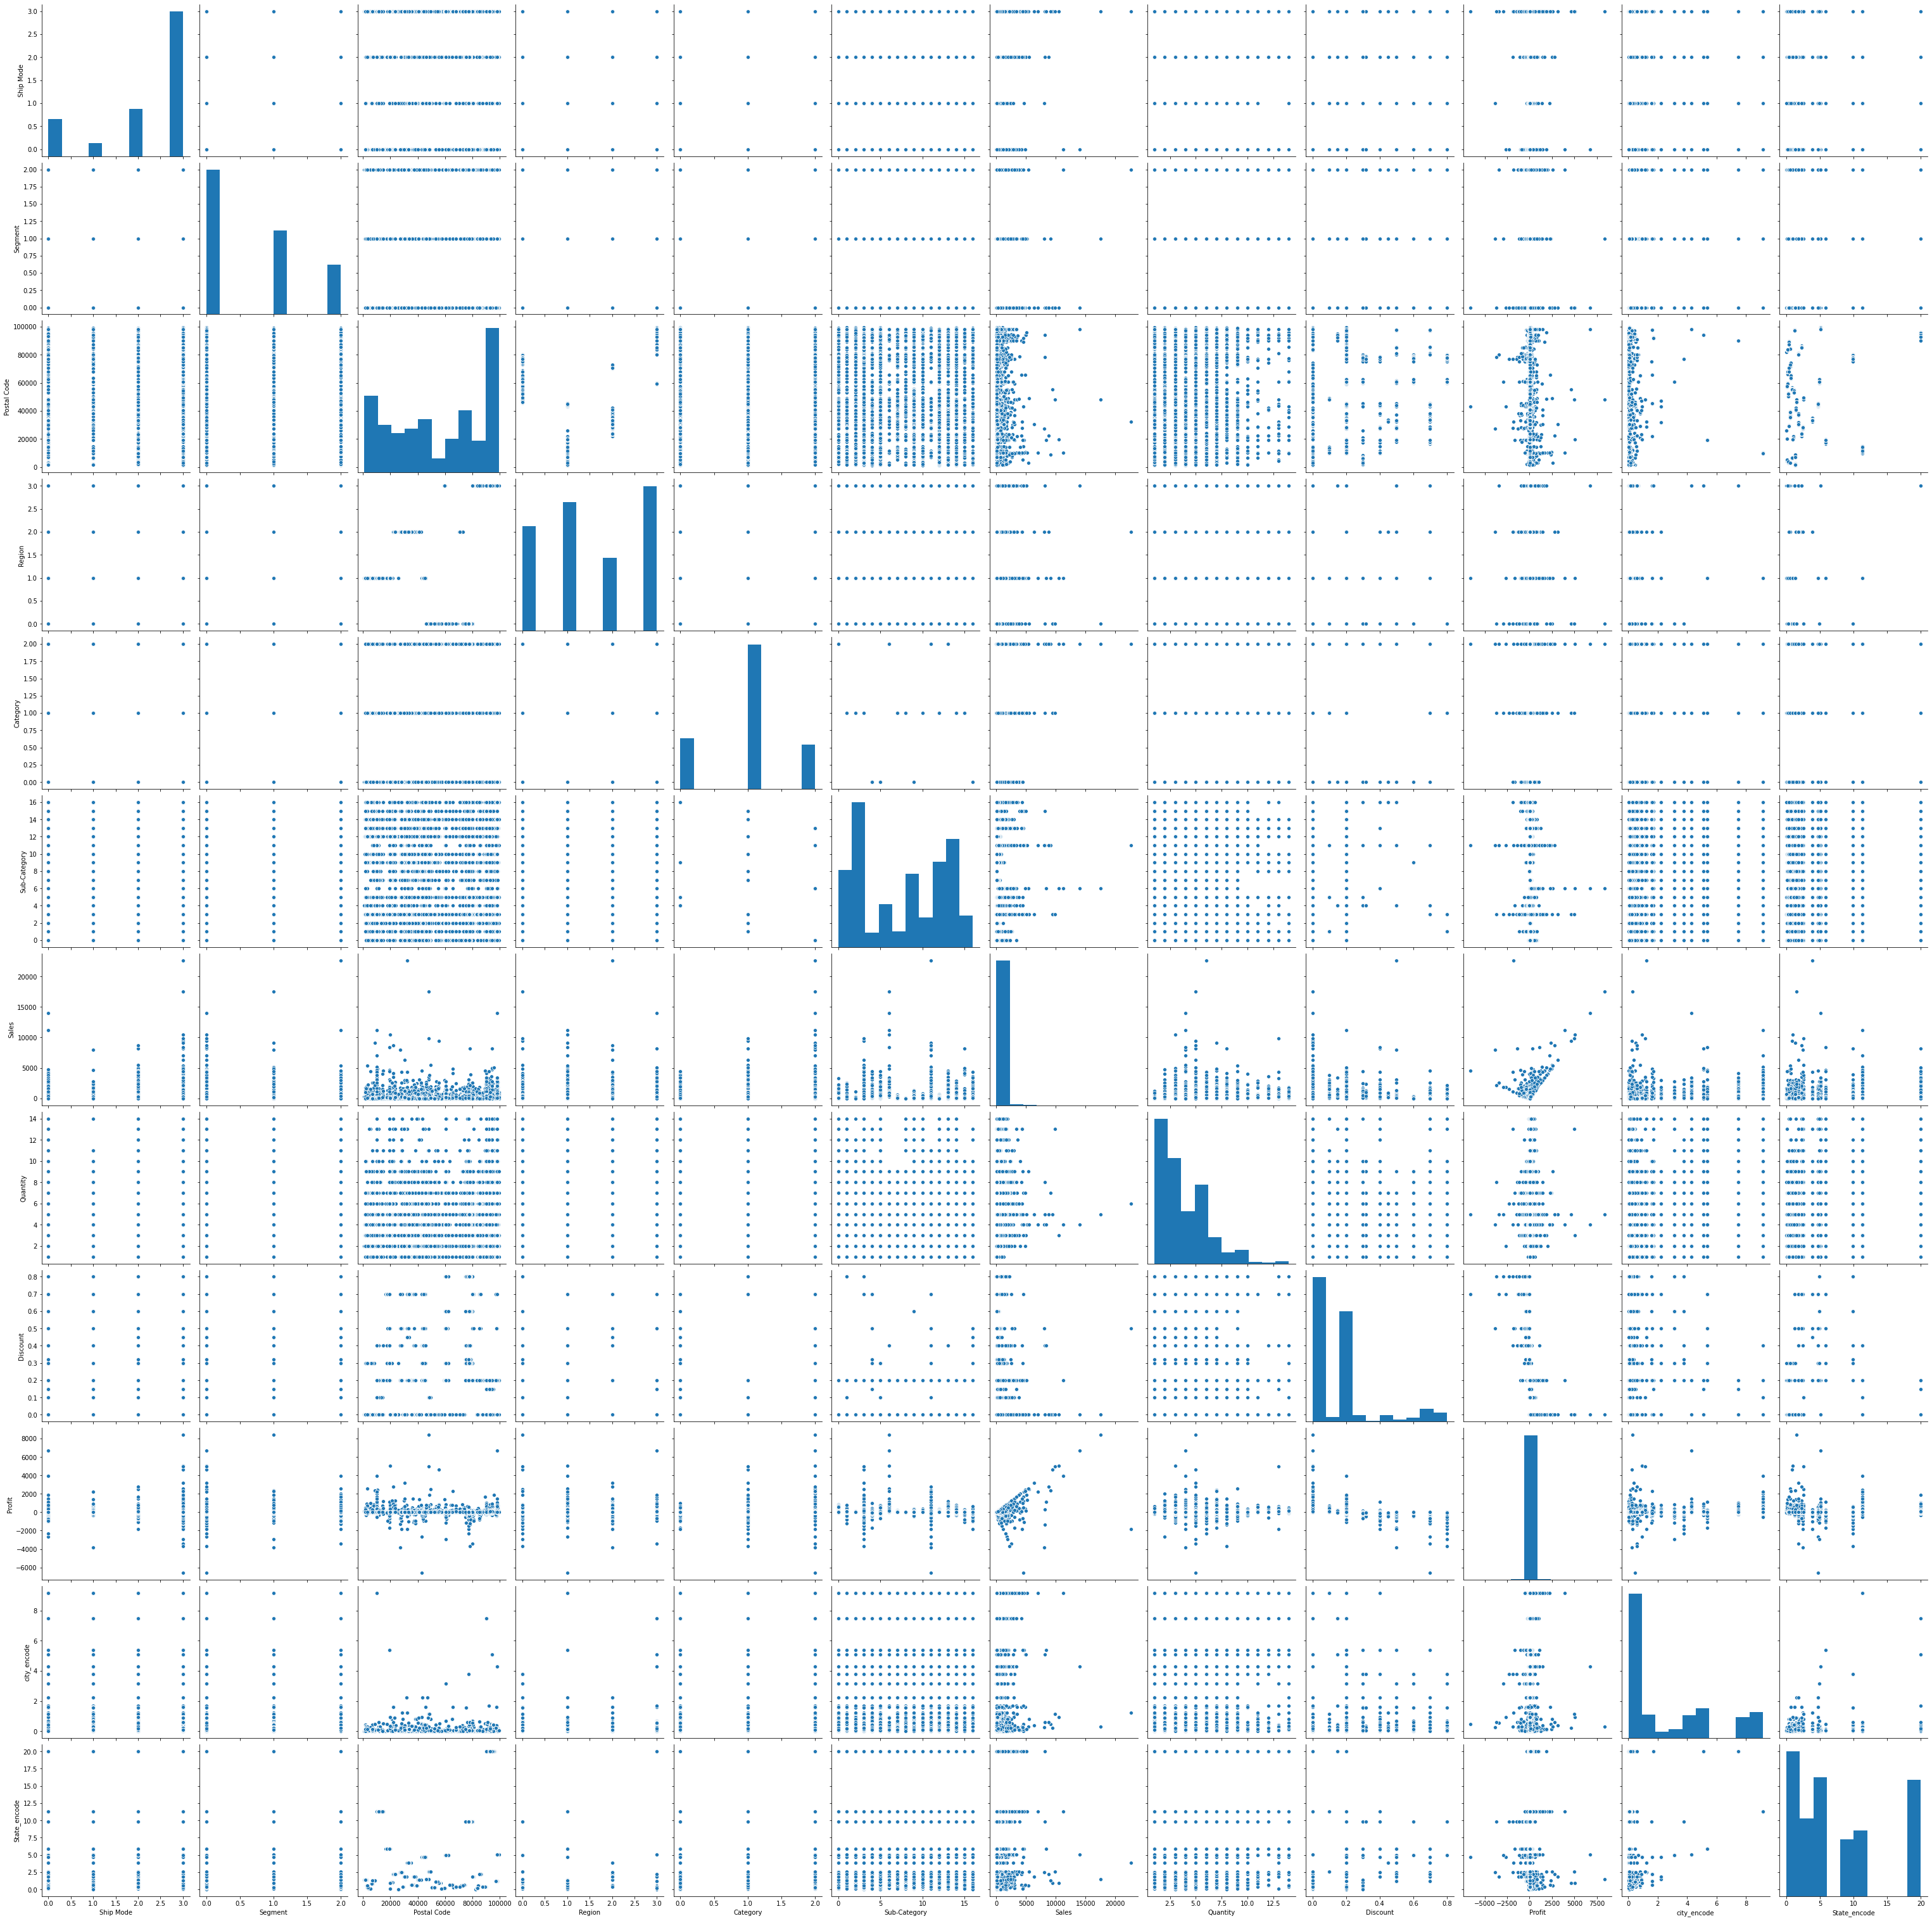

In [116]:
sns.pairplot(df,height=3.5)
plt.show()